<a href="https://colab.research.google.com/github/NewburghCat/dalmatians_sales/blob/main/DataSet_Prj_2A_DataClean_Resubmit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JodyAnn Bradford

Project 2: E-Commerce DataSet 

August 14th 2022.


In [105]:
# Project_2 : Data Set - E-Commerce Data 

This Data was chosen to facilitate an anaylsis which predicts a revelant product type according to the region and shipping. 

Description: 

An international e-commerce company based customer insight data. This company sells electronic products. 

Classification 

The target vector is Reached.on.Time_Y.N as either Yes (1) or No (2).  

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# load data 

file = '/content/drive/MyDrive/Colab Notebooks/Data Science - Machine Learning/WK 3/PROJECT2/Train_E-CommerceShippingData.csv'
df = pd.read_csv(file)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Data Cleaning 

In [109]:
# Checking for duplicates 

df.duplicated().sum()

0

No duplicates found 

In [110]:
# Checking data types 

df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

No Missing values 

The unnecessary column is 'ID'. It has been dropped. 

In [111]:
# Deleting unnecessary columns
df = df.drop(columns=['ID'])
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [112]:
# create a dtype filter to be used to count their values 

dtypes = df.dtypes
header_columns = dtypes[dtypes=='object'].index
header_columns

for all in header_columns:
  print(f'- column= {all}')
  print(df[all].value_counts(dropna=False))
  print('\n\n')

- column= Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



- column= Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64



- column= Product_importance
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64



- column= Gender
F    5545
M    5454
Name: Gender, dtype: int64





In [113]:
# Convert the string names of the classes to numeric values
# assign Iris_setosa=0, Iris-virginica=1, and Iris-versicolor=2

df['Warehouse_block'] = df['Warehouse_block'].replace({'A':0, 'B': 1, 'C':2, 'D':3, 'F':4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].replace({'Ship':0, 'Flight': 1, 'Road':2})
df['Product_importance'] = df['Product_importance'].replace({'low':0, 'medium': 1, 'high':2})
df['Gender'] = df['Gender'].replace({'F':0, 'M': 1})

In [114]:
# Checking dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


In [115]:
df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,0.481589,4.054459,2.990545,210.196836,3.567597,0.604600,0.495863,13.373216,3634.016729,0.596691
std,1.490726,0.754813,1.141490,1.413603,48.063272,1.522860,0.641464,0.500006,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,0.000000,3.000000,2.000000,169.000000,3.000000,0.000000,0.000000,4.000000,1839.500000,0.000000
50%,3.000000,0.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,4.000000,1.000000,5.000000,4.000000,251.000000,4.000000,1.000000,1.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


In [116]:
## Create X and y 

target = 'Reached.on.Time_Y.N'
X = df.drop(columns=target)
y = df[target]

In [117]:
## train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(8249, 10)

Feature Data Types

Numeric Features: Warehouse_block, Mode_of_Shipment, Product_Importance, Discount_offered

Nominal/Categorical Features: 8 Columns 

Preprocessor

A. OneHotEncoder 
B. Scaler to scale different scales. 

* No Missing values 

In [118]:

## Make a column selector for categories & test it 

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [119]:
## Instantiate OneHotEncoder and StandardScaler

ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

## Create tuples of (transformer, selector) - ColumnTransformer

cat_tuple = (ohe_encoder, cat_selector)
num_tuple = (scaler, num_selector)

In [120]:
## ColumnTransformer

preprocessor = make_column_transformer(cat_tuple, num_tuple)

Modeling

In [121]:

df['Reached.on.Time_Y.N'].value_counts(normalize = True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [122]:
# Arrange data into features matrix and target vector

y = df['Reached.on.Time_Y.N']
X = df.drop(columns = 'Reached.on.Time_Y.N')

In [123]:
# Train test Split(Model validation)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [124]:
# Decision Tree Classifier
# Make the instances of the model 
# Tree depth is measured of how many splits it makes before coming to a prediction
# There are also cases where the depth of field is not equal 
dec_tree = DecisionTreeClassifier(random_state=42, max_depth=2)

# Checking for hyperparameters that seem tunable
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [125]:
# The model is learning the relationship between X & y

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [126]:
# predict the labels of new data (Reached on Time (Y/N))

dec_tree.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0])

In [127]:
#Evaluate the model 
#Calculate classification accuracy 

train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.6700206085586131
0.6821818181818182


Visualization 

Scatter Plot, Histogram, Bar Plot Seaborn, Boxplot

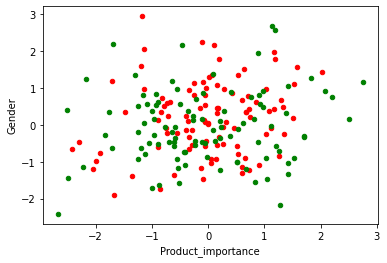

In [128]:
df = pd.DataFrame(np.random.randn(100, 4), columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])

ax1 = df.plot(kind='scatter', x='Warehouse_block', y='Mode_of_Shipment', color='r')    
ax2 = df.plot(kind='scatter', x='Product_importance', y='Gender', color='g', ax=ax1)    



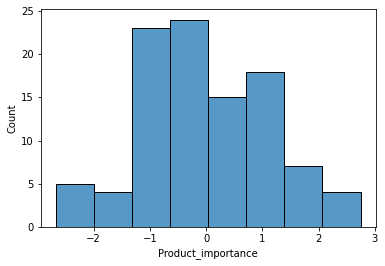

In [129]:
# Using a histogram to visualize Outcome 

sns.histplot(data=df,x='Product_importance')

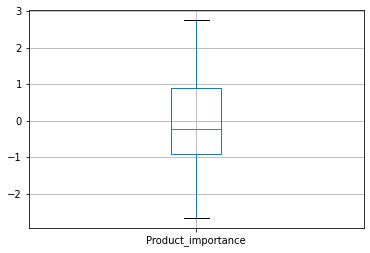

In [130]:
# Boxplot

df.boxplot(column='Product_importance')

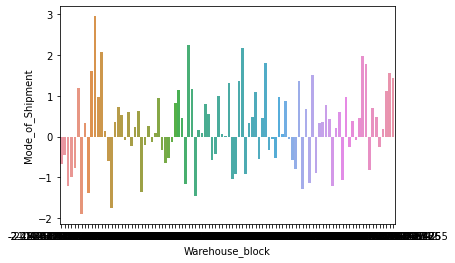

In [131]:
# Barplot - Seaborn

sns.barplot(data=df, x='Warehouse_block', y='Mode_of_Shipment')